#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#### Read in clean data

In [4]:
df = pd.read_csv("Data/AviationDataClean.csv");

/var/folders/0_/jyfznr0x5q53rj2pvwf26qbw0000gn/T/ipykernel_39934/3593098297.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/AviationDataClean.csv");


,Unnamed: 0,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,...,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Survive,total.passengers,Month,Year,Fraction_fatal,Fraction_uninjured
0,1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,...,UNK,Unknown,Probable Cause,19-09-1996,False,4.0,7,1962,1.0,0.0
1,2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,...,IMC,Cruise,Probable Cause,26-02-2007,False,3.0,8,1974,1.0,0.0
2,6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,...,IMC,Unknown,Probable Cause,06-11-2001,False,4.0,8,1981,1.0,0.0
3,7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,...,VMC,Takeoff,Probable Cause,01-01-1982,True,2.0,1,1982,0.0,1.0
4,8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,...,IMC,Landing,Probable Cause,01-01-1982,True,2.0,1,1982,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48595,88858,20221211106438,Accident,ERA23LA083,2022-12-09,"Hawkinsville, GA",United States,321814N,0832534W,51A,...,VMC,NaN,NaN,15-12-2022,True,1.0,12,2022,0.0,0.0
48596,88861,20221215106460,Accident,ERA23LA088,2022-12-10,"Alabaster, AL",United States,331040N,0086470W,EET,...,NaN,NaN,NaN,19-12-2022,True,2.0,12,2022,0.0,1.0
48597,88865,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,355745N,0835218W,DKX,...,VMC,NaN,NaN,15-12-2022,True,1.0,12,2022,0.0,1.0
48598,88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,...,NaN,NaN,NaN,14-12-2022,True,1.0,12,2022,0.0,1.0


#### Survive Vs. Make Visualization

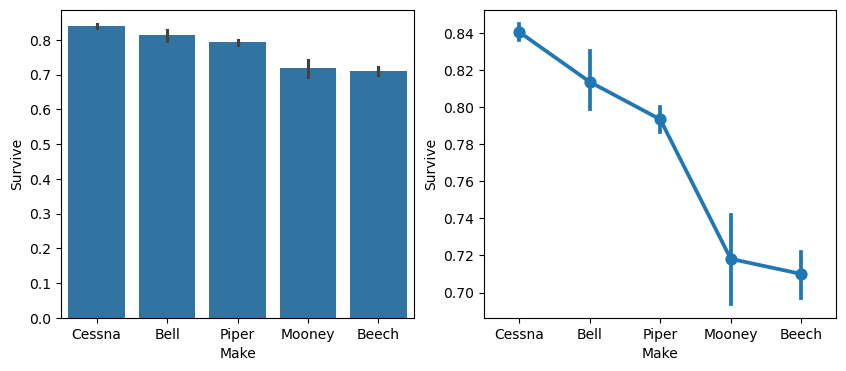

In [7]:
fig, ax = plt.subplots(1,2, figsize = (10,4))

sns.barplot(data=df, x='Make', y = 'Survive', ax = ax[0], order=df[["Make","Survive"]].groupby("Make").mean().sort_values("Survive",ascending=False).index)
sns.pointplot(data=df, x='Make', y = 'Survive', order=df[["Make","Survive"]].groupby("Make").mean().sort_values("Survive",ascending=False).index, ax = ax[1])

fig.savefig("Images/SurviveMake")

## Fraction Fatal & Uninjured vs Make: Substantial Damage

In [29]:
df["Aircraft.damage"].value_counts()

Aircraft.damage
Substantial    37683
Destroyed      10466
Minor            222
Unknown           34
Name: count, dtype: int64

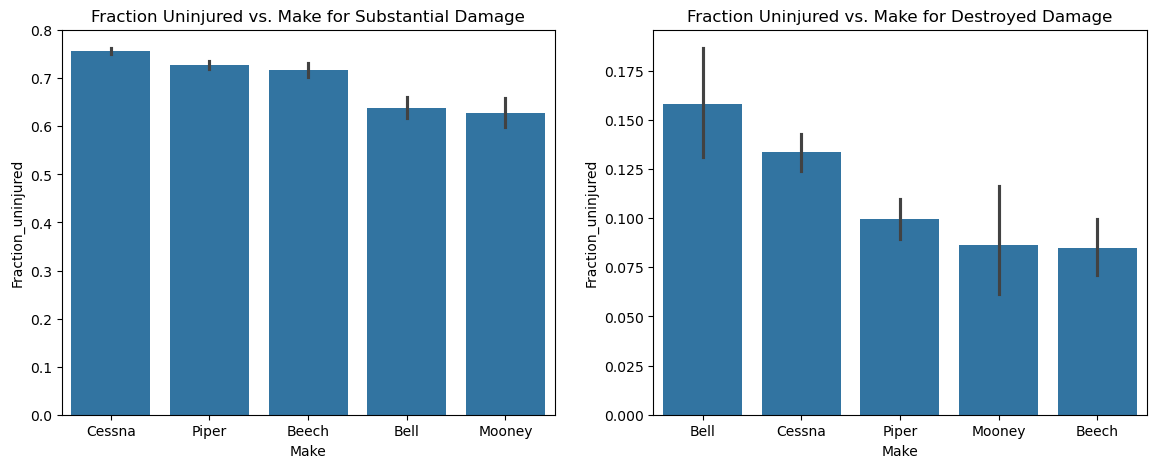

In [46]:
fig, ax = plt.subplots(1,2,figsize=[14,5])

df_substantial = df[df["Aircraft.damage"] == "Substantial"]
df_destroyed = df[df["Aircraft.damage"] == "Destroyed"]

order = df_substantial[["Make","Fraction_uninjured"]].groupby("Make").mean().sort_values(by="Fraction_uninjured",ascending=False).index
sns.barplot(data=df_substantial, x='Make', y = 'Fraction_uninjured',order=order, ax=ax[0])
ax[0].set_title("Fraction Uninjured vs. Make for Substantial Damage")

order = df_destroyed[["Make","Fraction_uninjured"]].groupby("Make").mean().sort_values(by="Fraction_uninjured",ascending=False).index
sns.barplot(data=df_destroyed, x='Make', y = 'Fraction_uninjured',order=order, ax=ax[1])
ax[1].set_title("Fraction Uninjured vs. Make for Destroyed Damage")

fig.savefig("Images/FracUninuredMake")

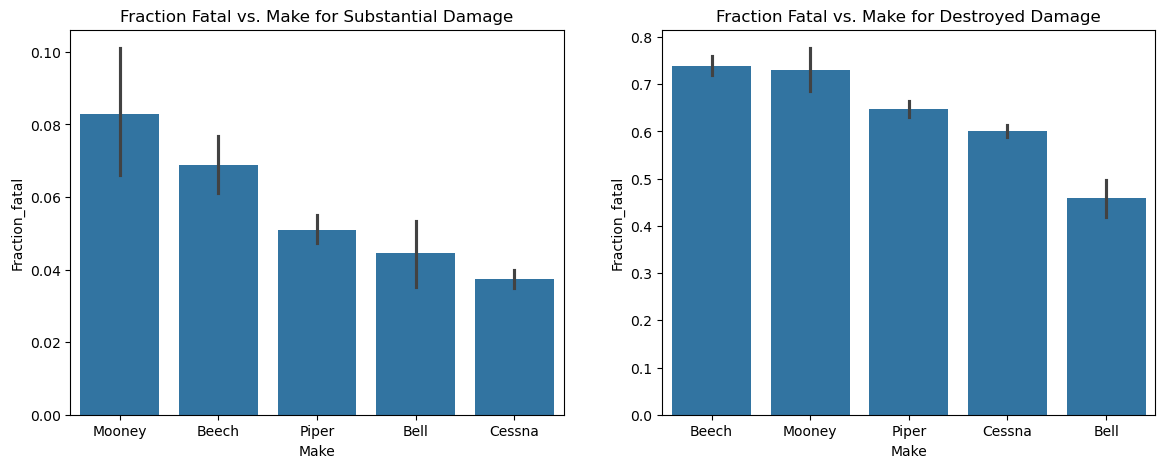

In [47]:
fig, ax = plt.subplots(1,2,figsize=[14,5])

df_substantial = df[df["Aircraft.damage"] == "Substantial"]
df_destroyed = df[df["Aircraft.damage"] == "Destroyed"]

order = df_substantial[["Make","Fraction_fatal"]].groupby("Make").mean().sort_values(by="Fraction_fatal",ascending=False).index
sns.barplot(data=df_substantial, x='Make', y = 'Fraction_fatal',order=order, ax=ax[0])
ax[0].set_title("Fraction Fatal vs. Make for Substantial Damage")

order = df_destroyed[["Make","Fraction_fatal"]].groupby("Make").mean().sort_values(by="Fraction_fatal",ascending=False).index
sns.barplot(data=df_destroyed, x='Make', y = 'Fraction_fatal',order=order, ax=ax[1])
ax[1].set_title("Fraction Fatal vs. Make for Destroyed Damage")

fig.savefig("Images/FracFatalMake")

## Broad Phase of Flight vs Fraction Fatal

In [56]:
phases_flight = df["Broad.phase.of.flight"].value_counts().index[:-2]
df_phases = df[df["Broad.phase.of.flight"].map(lambda x: x in phases_flight)]
df_phases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37709 entries, 1 to 38302
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              37709 non-null  int64  
 1   Event.Id                37709 non-null  object 
 2   Investigation.Type      37709 non-null  object 
 3   Accident.Number         37709 non-null  object 
 4   Event.Date              37709 non-null  object 
 5   Location                37705 non-null  object 
 6   Country                 37575 non-null  object 
 7   Latitude                6238 non-null   object 
 8   Longitude               6237 non-null   object 
 9   Airport.Code            22406 non-null  object 
 10  Airport.Name            23896 non-null  object 
 11  Injury.Severity         37709 non-null  object 
 12  Aircraft.damage         37567 non-null  object 
 13  Aircraft.Category       4424 non-null   object 
 14  Registration.Number     37708 non-null  obj

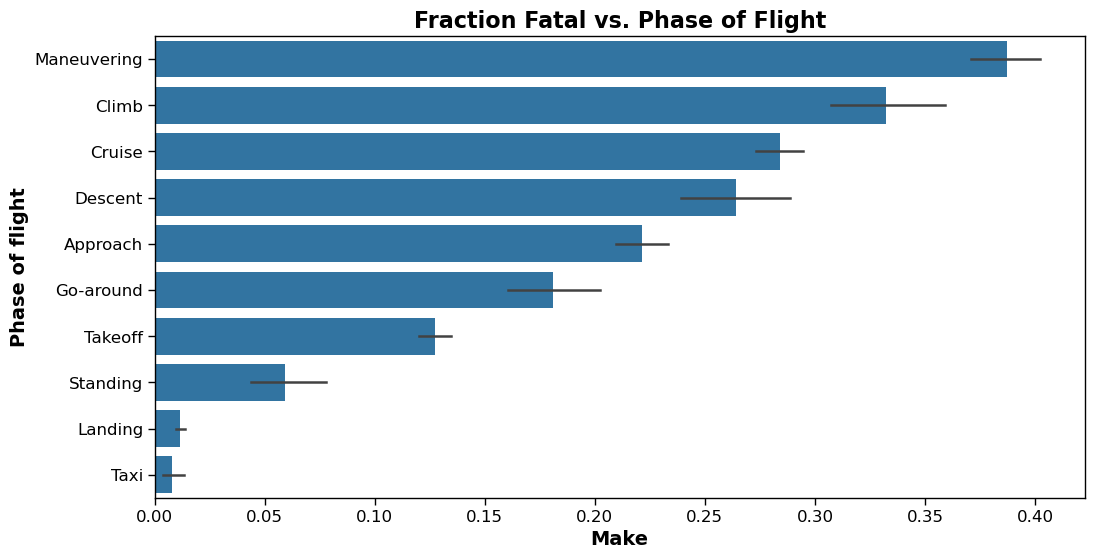

In [102]:
fig, ax = plt.subplots(figsize= (12,6))

order = df_phases[["Broad.phase.of.flight","Fraction_fatal"]].groupby("Broad.phase.of.flight").mean().sort_values(by="Fraction_fatal",ascending=False).index

sns.barplot(data=df_phases, y='Broad.phase.of.flight', x = 'Fraction_fatal', order=order, ax=ax)
ax.set_title("Fraction Fatal vs. Phase of Flight", fontsize=16, fontweight = 'bold')

ax.tick_params(labelsize=12)
ax.set_xlabel('Make', fontweight = 'bold', fontsize=14)
ax.set_ylabel('Phase of flight', fontweight = 'bold', fontsize=14)

fig.savefig("Images/PhaseOfFlightFatality")


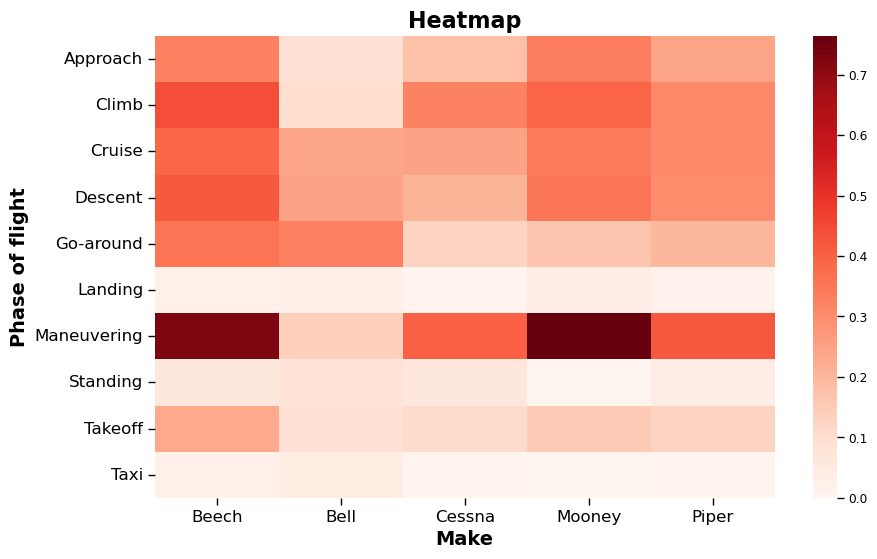

In [98]:
fig, ax = plt.subplots(figsize=(10,6))

#sns.set_context('paper')

table = pd.pivot_table(df_phases, index=['Make'],columns=['Broad.phase.of.flight'], values='Fraction_fatal').T
sns.heatmap(table, cmap="Reds", ax=ax)
ax.set_title('Heatmap', fontsize=16, fontweight = 'bold')
ax.tick_params(labelsize=12)
ax.set_xlabel('Make', fontweight = 'bold', fontsize=14)
ax.set_ylabel('Phase of flight', fontweight = 'bold', fontsize=14)

fig.savefig("Images/Fatality_Make_Phases", bbox_inches = 'tight')

## Broad Phase of Flight vs Fraction Unijured ?

## Month vs Fraction Fatal

## Year vs Fraction Fatal